# Show the experimental results

In [40]:
# import Packages
using JLD
using Statistics
using Plots, StatsPlots
default(:bglegend, plot_color(default(:bg), 0.8))
default(:fglegend, plot_color(ifelse(isdark(plot_color(default(:bg))), :white, :black), 0.6));

# Forward SFS

## False Positive Rate (FPR)

In [7]:
# load results
FPR_homotopy, FPR_homotopy_H, FPR_homotopy_S, FPR_polytope, FPR_DS = jldopen("result/ex_FPR.jld", "r") do f
    read(f["FPR_A"]), read(f["FPR_Ao"]), read(f["FPR_As"]), read(f["FPR_Aso"]), read(f["FPR_DS"])
end;

In [13]:
Ns = [50, 100, 150, 200]
zero_num = size(FPR_homotopy, 1)
FPR_homotopy_mean = reshape(mean(FPR_homotopy, dims=2), zero_num, length(Ns))
FPR_homotopy_H_mean = reshape(mean(FPR_homotopy_H, dims=2), zero_num, length(Ns))
FPR_homotopy_S_mean = reshape(mean(FPR_homotopy_S, dims=2), zero_num, length(Ns))
FPR_polytope_mean = reshape(mean(FPR_polytope, dims=2), zero_num, length(Ns))
FPR_DS_mean = reshape(mean(FPR_DS, dims=2), zero_num, length(Ns));

In [14]:
Cs = [:red, :orange, :green, :blue, :purple]
p = Array{typeof(plot())}(undef, zero_num)
for j in 1:zero_num
    plot()
    plot!(1:length(Ns), FPR_homotopy_mean[j,:], label="Homotopy", color=Cs[1], markershape=:circle)
    plot!(1:length(Ns), FPR_homotopy_H_mean[j,:], label="Homotopy-H", color=Cs[2], markershape=:circle)
    plot!(1:length(Ns), FPR_homotopy_S_mean[j,:], label="Homotopy-S", color=Cs[3], markershape=:circle)
    plot!(1:length(Ns), FPR_polytope_mean[j,:], label="Polytope", color=Cs[4], markershape=:circle)
    plot!(1:length(Ns), FPR_DS_mean[j,:], label="DS", color=Cs[5], markershape=:circle)
    # plot setting
    plot!(; ylims=(0, 0.3))
    plot!(; xlabel="Sample size", ylabel="False Positive Rate (FPR)")
    plot!(; legend=:topright)
    plot!(; guidefontsize=16, legendfontsize=12, tickfontsize=10)
    p[j] = plot!(; xticks=(1:length(Ns), Ns))
end

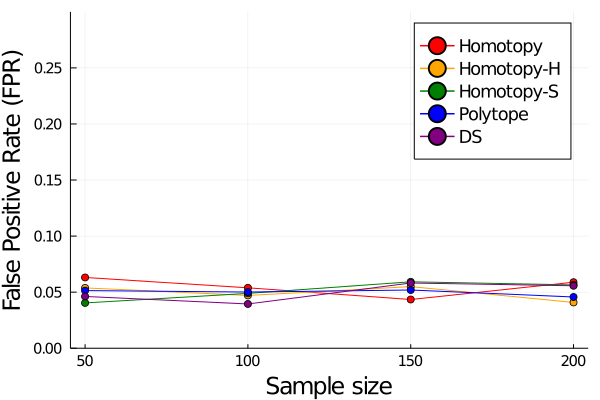

In [15]:
p[1]

## True Positive Rate (TPR)

In [17]:
# load results
TPR_homotopy, TPR_homotopy_H, TPR_homotopy_S, TPR_polytope, TPR_DS = jldopen("result/ex_TPR.jld", "r") do f
    read(f["TPR_A"]), read(f["TPR_Ao"]), read(f["TPR_As"]), read(f["TPR_Aso"]), read(f["TPR_DS"])
end;

In [19]:
Ns = [50, 100, 150, 200]
nonzero_num = size(TPR_homotopy, 1)
iter_size = size(TPR_homotopy, 2)

TPR_homotopy_mean = reshape(mean(TPR_homotopy, dims=2), nonzero_num, length(Ns))
TPR_homotopy_SE = reshape(std(TPR_homotopy, dims=2) ./ √iter_size, nonzero_num, length(Ns))
TPR_homotopy_H_mean = reshape(mean(TPR_homotopy_H, dims=2), nonzero_num, length(Ns))
TPR_homotopy_H_SE = reshape(std(TPR_homotopy_H, dims=2) ./ √iter_size, nonzero_num, length(Ns))
TPR_homotopy_S_mean = reshape(mean(TPR_homotopy_S, dims=2), nonzero_num, length(Ns))
TPR_homotopy_S_SE = reshape(std(TPR_homotopy_S, dims=2) ./ √iter_size, nonzero_num, length(Ns))
TPR_polytope_mean = reshape(mean(TPR_polytope, dims=2), nonzero_num, length(Ns))
TPR_polytope_SE = reshape(std(TPR_polytope, dims=2) ./ √iter_size, nonzero_num, length(Ns))
TPR_DS_mean = reshape(mean(TPR_DS, dims=2), nonzero_num, length(Ns))
TPR_DS_SE = reshape(std(TPR_DS, dims=2) ./ √iter_size, nonzero_num, length(Ns));

In [26]:
Cs = [:red, :orange, :green, :blue, :purple]
p = Array{typeof(plot())}(undef, nonzero_num)
for j in 1:nonzero_num
    p[j] = plot()
    # Homotopy
    plot!(p[j], 1:length(Ns), (TPR_homotopy_mean - TPR_homotopy_SE)[j,:]; fillrange=(TPR_homotopy_mean + TPR_homotopy_SE)[j,:], fillalpha=0.2, α=0, label=nothing, color=Cs[1])
    plot!(p[j], 1:length(Ns), TPR_homotopy_mean[j,:], label="Homotopy", color=Cs[1], markershape=:circle)
    # Homotopy-H
    plot!(p[j], 1:length(Ns), (TPR_homotopy_H_mean - TPR_homotopy_H_SE)[j,:]; fillrange=(TPR_homotopy_H_mean + TPR_homotopy_H_SE)[j,:], fillalpha=0.2, α=0, label=nothing, color=Cs[2])
    plot!(p[j], 1:length(Ns), TPR_homotopy_H_mean[j,:], label="Homotopy-H", color=Cs[2], markershape=:circle)
    # Homotopy-S
    plot!(p[j], 1:length(Ns), (TPR_homotopy_S_mean - TPR_homotopy_S_SE)[j,:]; fillrange=(TPR_homotopy_S_mean + TPR_homotopy_S_SE)[j,:], fillalpha=0.2, α=0, label=nothing, color=Cs[3])
    plot!(p[j], 1:length(Ns), TPR_homotopy_S_mean[j,:], label="Homotopy-S", color=Cs[3], markershape=:circle)
    # Polytope
    plot!(p[j], 1:length(Ns), (TPR_polytope_mean - TPR_homotopy_SE)[j,:]; fillrange=(TPR_polytope_mean + TPR_homotopy_SE)[j,:], fillalpha=0.2, α=0, label=nothing, color=Cs[4])
    plot!(p[j], 1:length(Ns), TPR_polytope_mean[j,:], label="Polytope", color=Cs[4], markershape=:circle)
    # DS
    plot!(p[j], 1:length(Ns), (TPR_DS_mean - TPR_DS_SE)[j,:]; fillrange=(TPR_DS_mean + TPR_DS_SE)[j,:], fillalpha=0.2, α=0, label=nothing, color=Cs[5])
    plot!(p[j], 1:length(Ns), TPR_DS_mean[j,:], label="DS", color=Cs[5], markershape=:circle)
    # plot setting
    plot!(p[j]; ylims=(0, 1))
    plot!(p[j]; legend=:topleft)
    plot!(p[j]; xlabel="Sample size", ylabel="True Positive Rate (TPR)")
    plot!(p[j]; guidefontsize=16, legendfontsize=12, tickfontsize=10)
end

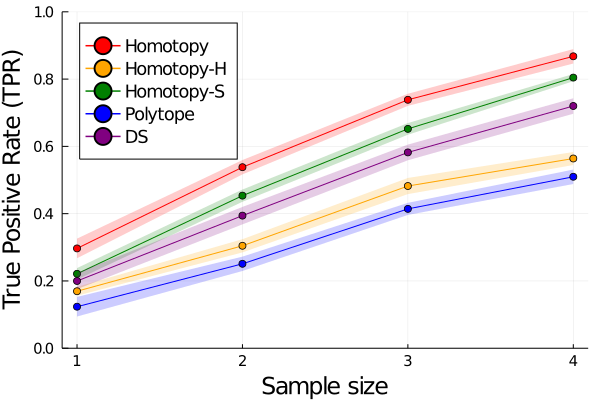

In [27]:
p[1]

## Lengths of CIs

In [28]:
# load results
results = jldopen(relpath("result/ex_CI_length.jld"), "r") do f
    read(f["result"])
end
tmp = results[2]
results[2] = results[3]
results[3] = tmp;

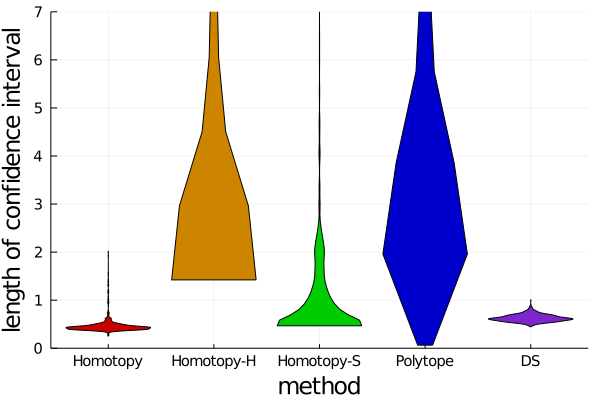

In [32]:
Cs = [:red3, :orange3, :green3, :blue3, :purple3]
p = plot()
for i in eachindex(results)
    violin!(p, fill(i, length(results[i])), results[i]; c=Cs[i], label=nothing)
end
plot!(p; xticks=(1:length(results), ["Homotopy", "Homotopy-H", "Homotopy-S", "Polytope", "DS"]))
plot!(p; xlabel="method", ylabel="length of confidence interval")
# scatter!(p, 1:length(results), median.(results); c=:magenta, label=nothing)
plot!(p; guidefontsize=16, legendfontsize=12, tickfontsize=10)
plot!(p; ylims=(0, 7))

# Forward-Backward SFS

## FPR

In [34]:
# load results
FPR, FPR_OC = jldopen("result/stepwise/ex_FPR_FB.jld", "r") do f
    read(f["FPR"]), read(f["FPR_OC"])
end;

In [36]:
FPR_mean = reshape(mean(FPR, dims=1), size(FPR, 2), size(FPR, 3))
FPR_OC_mean = reshape(mean(FPR_OC, dims=1), size(FPR_OC, 2), size(FPR_OC, 3));

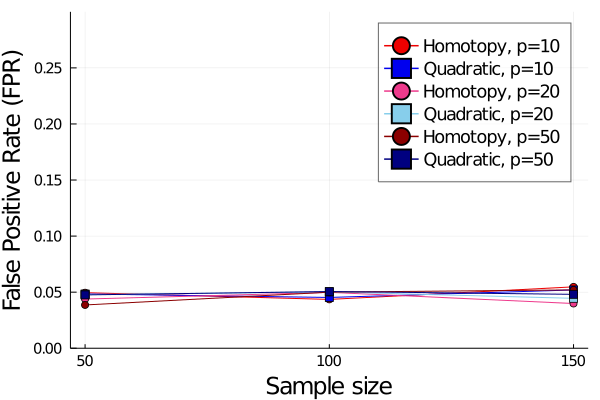

In [37]:
Ns = (50, 100, 150)
ps = (10, 20, 50)
h_cs = (:red2, :violetred2, :darkred)
o_cs = (:blue2, :skyblue, :navyblue)
p = plot()
for j = 1:size(FPR, 3) # σ
    plot!(p, 1:length(Ns), FPR_mean[:,j], label="Homotopy, p=$(ps[j])", color=h_cs[j], markershape=:circle)
    plot!(p, 1:length(Ns), FPR_OC_mean[:,j], label="Quadratic, p=$(ps[j])", color=o_cs[j], markershape=:rect)
end
# plot setting
plot!(p; ylims=(0, 0.3))
plot!(p; xlabel="Sample size", ylabel="False Positive Rate (FPR)")
plot!(p; legend=:topright)
plot!(p; guidefontsize=16, legendfontsize=12, tickfontsize=10)
plot!(p; xticks=(1:length(Ns), Ns))

## TPR

In [38]:
# load results
TPR, TPR_OC = jldopen("result/stepwise/ex_TPR_FB.jld", "r") do f
    read(f["TPR"]), read(f["TPR_OC"])
end;

In [39]:
TPR_mean = reshape(mean(TPR, dims=1), size(TPR, 2), size(TPR, 3), size(TPR, 4))
TPR_SE = reshape(std(TPR, dims=1) ./ √size(TPR, 1), size(TPR, 2), size(TPR, 3), size(TPR, 4))
TPR_OC_mean = reshape(mean(TPR_OC, dims=1), size(TPR_OC, 2), size(TPR_OC, 3), size(TPR_OC, 4))
TPR_OC_SE = reshape(std(TPR_OC, dims=1) ./ √size(TPR_OC, 1), size(TPR_OC, 2), size(TPR_OC, 3), size(TPR_OC, 4));

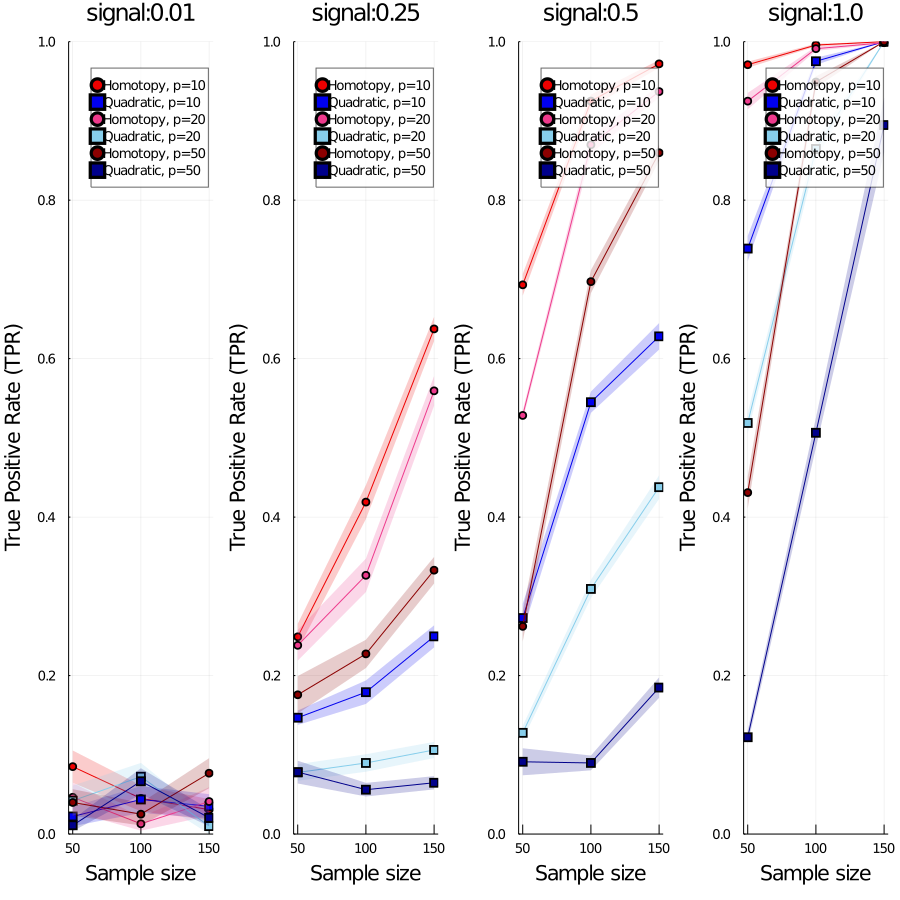

In [42]:
Ns = (50, 100, 150)
ps = (10, 20, 50)
βs = (0.01, 0.25, 0.5, 1.)
p = Array{typeof(plot())}(undef, length(βs))
h_cs = (:red2, :violetred2, :darkred)
o_cs = (:blue2, :skyblue, :darkblue)
for k = eachindex(βs)
    p[k] = plot()
    for j = eachindex(ps) # p
        # Homotopy
        plot!(p[k], 1:length(Ns), (TPR_mean - TPR_SE)[:,j,k]; fillrange=(TPR_mean + TPR_SE)[:,j,k], fillalpha=0.2, α=0, label=nothing, color=h_cs[j])
        plot!(p[k], 1:length(Ns), TPR_mean[:,j,k], label="Homotopy, p=$(ps[j])", color=h_cs[j], markershape=:circle)
        # Quadratic
        plot!(p[k], 1:length(Ns), (TPR_OC_mean - TPR_OC_SE)[:,j,k]; fillrange=(TPR_OC_mean + TPR_OC_SE)[:,j,k], fillalpha=0.2, α=0, label=nothing, color=o_cs[j])
        plot!(p[k], 1:length(Ns), TPR_OC_mean[:,j,k], label="Quadratic, p=$(ps[j])", color=o_cs[j], markershape=:rect)
    end
    # plot setting
    plot!(p[k]; ylims=(0, 1))
    plot!(p[k]; legend=:best)
    plot!(p[k]; xlabel="Sample size", ylabel="True Positive Rate (TPR)")
    plot!(p[k]; guidefontsize=14, legendfontsize=9, tickfontsize=9)
    plot!(p[k]; xticks=(1:length(Ns), Ns))
    plot!(p[k]; title="signal:$(βs[k])")
    filename = string("TPR_signal_", βs[k], ".pdf")
end
plot(p..., layout=(1, 4), titlefontsize=16, size=(900, 900))

## Lengths of CIs

In [44]:
# load results
CI_lengths, CI_lengths_OC = jldopen("result/stepwise/ex_CI_length.jld", "r") do f
    read(f["CI_lengths"]), read(f["CI_lengths_OC"])
end;

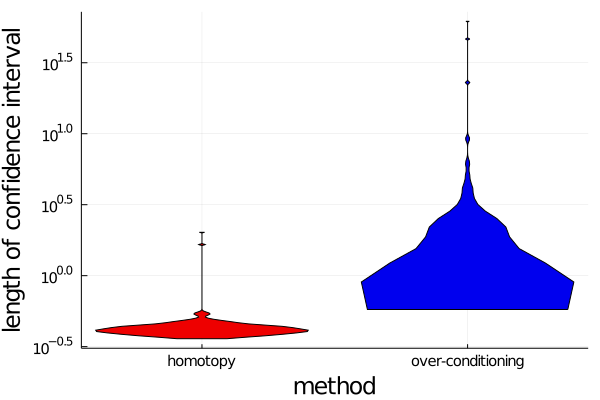

In [45]:
p = plot()
violin!(p, fill(1, length(CI_lengths)), CI_lengths; c=:red2, label=nothing)
violin!(p, fill(2, length(CI_lengths_OC)), CI_lengths_OC; c=:blue2, label=nothing)
plot!(p; xticks=(1:2, ["homotopy", "over-conditioning"]))
plot!(p; yscale=:log10)
plot!(p; xlabel="method", ylabel="length of confidence interval")
plot!(p; guidefontsize=16, legendfontsize=12, tickfontsize=10)